In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from monotonic import *
from physical import *
from mc_density import *
from mc_interior import *

In [2]:
# Set for Uranus
mass = 8.7e28
moment_ratio=0.23
radius = 2.5e9
pct_rock, pct_water, pct_env = 0.6, 0.3, 0.1
num_shells = 100
rock_0 = 1.0  # This is the rock percent in the innermost shell.
env_0 = 1.0 # This is the env percent in the outmost shell.

In [3]:
MAX_TEMP = 50000
#seed = 0.0736041243668144
#seed = 0.09577969690452326

def get_composition(temp_array, max_temp = MAX_TEMP):
    # Returns a composition that has monotonic temp/rock pct.
    # Remaining shells are -1.   These are expected to be filled with env.
    temps = np.array(temp_array)
    cur_max = max_temp
    cur_rock = 1.0
    rock_pct = []
    env_pct = []
    for i in range(temps.shape[1]):
        shells = temps[:,i]
        # find the shells that fit the temp
        below = np.where(shells<=cur_max)[0]
        if len(below) == 0:
            rock_pct.append(0.0)
            env_pct.append(1.0)
            cur_max = 0.0
            cur_rock = 0.0
            continue
        below = below[-1]
        above = np.where(shells>cur_max)[0]
        if len(above) == 0:
            rock_pct.append(0.0)
            env_pct.append(1.0)
            cur_max = 0.0
            cur_rock = 0.0
            continue
        above = above[0]
        if not above-below == 1:
            # Got that weird case with temps inverted
            rock_pct.append(0.0)
            env_pct.append(1.0)
            cur_max = 0.0
            cur_rock = 0.0
            continue
        pct = below + (cur_max - shells[below])/(shells[above]-shells[below])
        pct = pct/10.0
        if cur_rock < pct:
            pct = cur_rock
        # compute possible new temp:
            bot = int(pct*10)
            frac = 10*pct-bot
            cur_max = shells[bot]* (1-frac) + shells[bot+1]*frac
        else:
            cur_rock= pct
        
        rock_pct.append(pct)
        env_pct.append(0.0)
    return np.array(rock_pct), np.array(env_pct)
        
        

In [9]:
def get_fixed_temp_model(mass, moment_ratio, radius, num_shells, max_temp=MAX_TEMP, seed=None, full_model= False):
    if seed == None:
        seed = random.random()
    random.seed(seed)
    mcdensity = create_mcdensity(mass, moment_ratio, radius, num_shells=num_shells)
    rock = np.ones(num_shells)
    env = np.zeros(num_shells)
    temps = []
    for i in range(11):
        pct_rock = i/10.0
        mcinterior = MCInterior(mcdensity._radii, mcdensity._densities, rock*pct_rock, env)
        temps.append(mcinterior.get_temp())
        
    fixed_rock, fixed_env  = get_composition(temps)
    fixed_int = MCInterior(mcdensity._radii, mcdensity._densities, fixed_rock, fixed_env)
    if full_model:
        return seed, fixed_int.compute_rock_water_ratio(), fixed_int
    return seed, fixed_int.compute_rock_water_ratio()

In [5]:
retval = []
for i in range(1000):
    retval.append(get_fixed_temp_model(mass, moment_ratio, radius, num_shells))

/usr/local/python/python-3.7/std/lib64/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # Work around a problem in Jupyter Lab, which exists as of 201902.
/usr/local/python/python-3.7/std/lib64/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # path of the virtualenv of the Jupyter Lab/Notebook server, and if so,


In [6]:
retval



[(0.1317988980588677, nan),
 (0.6406178233376763, nan),
 (0.36755601770913804, nan),
 (0.4458076013294824, 0.17352304629465085),
 (0.526181517761718, nan),
 (0.02223297213084774, nan),
 (0.17846952696571827, 0.6376144887913291),
 (0.8948463646104119, 0.5635625503315148),
 (0.6525296840708494, nan),
 (0.9318389798432699, nan),
 (0.3706767965209202, nan),
 (0.8748802315734052, nan),
 (0.023476938988915896, nan),
 (0.4849893576230556, nan),
 (0.5309320478687916, 0.1928201509585506),
 (0.2089511159594316, nan),
 (0.9224086517147528, 2.276066576433363),
 (0.49216545122284283, nan),
 (0.16381040904595467, nan),
 (0.8395788019660264, nan),
 (0.11033797405474244, 4.775024283225094),
 (0.5679242419559312, nan),
 (0.846338069370893, nan),
 (0.12416295761647678, 1.3610403345015352),
 (0.06708342082183616, nan),
 (0.8023710050241748, nan),
 (0.0075985833743769104, nan),
 (0.7838961134116259, 0.8572417404587566),
 (0.8976294677955607, nan),
 (0.4437606711667803, nan),
 (0.3649564001592458, nan),
 (

In [68]:
fi = get_fixed_temp_model(mass, moment_ratio,radius, num_shells, seed = 0.6784942659963682, full_model=True)[2]

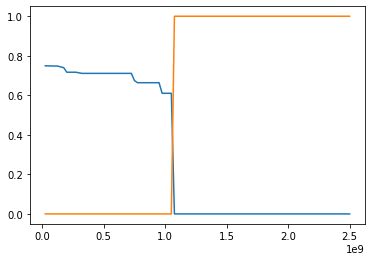

In [69]:
fi.plot_rock()
fi.plot_env()

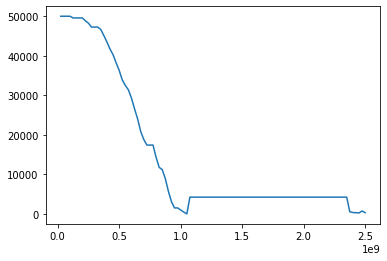

In [70]:
fi.plot_temp()

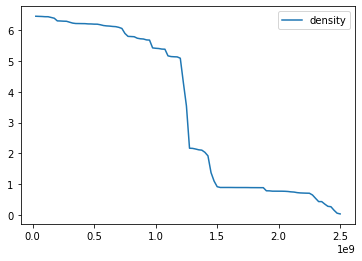

In [71]:
fi.plot_densities()

In [72]:
print(fi.compute_rock_mass()/fi.get_mass())
print(fi.compute_water_mass()/fi.get_mass())
print(fi.compute_env_mass()/fi.get_mass())

0.2160072879223147
0.10737810861375985
0.6766146034639254


In [ ]:
fi.